# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span>

### Exercise 05.1

In questo esercizio viene chiesto di utilizzare l'algoritmo di Metropolis per campionare le densità di probabilità $|\Psi_{1,0,0}(x,y,z)|^2$ e $|\Psi_{2,1,0}(x,y,z)|^2$ dell'atomo di idrogeno, utilizzando prima una probabilità di transizione $T(\vec{x}|\vec{y})$ uniforme e poi una normale multivariata. La funzione d'onda dello stato fondamentale in coordinate cartesiane è:

$$
\Psi_{1,0,0}(x,y,z)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-\frac{\sqrt{x^2+y^2+z^2}}{a_0}} 
$$

mentre quella di uno dei tre stati eccitati 2p è:

$$
\Psi_{2,1,0}(x,y,z)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} ze^{-\frac{\sqrt{x^2+y^2+z^2}}{2a_0}}
$$

dove $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm è il raggio di Bhor. Viene anche chiesto di stimare $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ e $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ mediante le posizioni campionate e di confrontare i risultati con i valori attesi dal modello teorico:

$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$

Data una funzione di distribuzione di probabilità $p(\vec{x})$ che desideriamo campionare, dove $\vec{x}$ è un vettore multidimensionale, la tecnica $M(RT)^2$ stabilisce un *random walk* il cui passo è progettato in modo che, quando ripetuto molte volte, la distribuzione asintotica dei campioni $\vec{x}$ sia $p(\vec{x})$. Le probabilità di transizione da cui è campionato il tentativo di spostamento, che sono state utilizzate nella simulazione, soddisfano $T(\vec{x}|\vec{y}) = T(\vec{y}|\vec{x})$, pertanto l'accettazione si è ridotta a $A(\vec{x}|\vec{y}) = \min\big[1, \frac{p(\vec{x})}{p(\vec{y})}\big]$.

Per eseguire la simulazione è necessario fornire un file *input.dat*, in cui si specifica la densità di probabilità da campionare: 0 per lo stato fondamentale e 1 per lo stato 2p, la probabilità di transizione: 0 per quella uniforme e 1 per quella Gaussiana, le coordinate $x_0$, $y_0$, $z_0$ del punto di partenza, il passo $\delta$ della probabilità di transizione, il numero di blocchi e gli step in ogni blocco.

Per ottenere il 50% di accettazione, in modo da coniugare una veloce convergenza con una correlazione non elevata, sono stati assunti i seguenti valori per il passo $\delta$ della probabilità di transizione:

- stato fondamentale: $\delta_{unif} = 1.2$, $\delta_{gauss} = 0.75$ 
- stato 2p: $\delta_{unif} = 3$, $\delta_{gauss} = 1.8$ 

### Equilibrazione

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
X_gs, Y_gs, Z_gs, R_gs = np.loadtxt('GS_EQUILIB/coordinates.txt', unpack=True, usecols=(0,1,2,3))
X_2p, Y_2p, Z_2p, R_2p = np.loadtxt('2P_EQUILIB/coordinates.txt', unpack=True, usecols=(0,1,2,3))

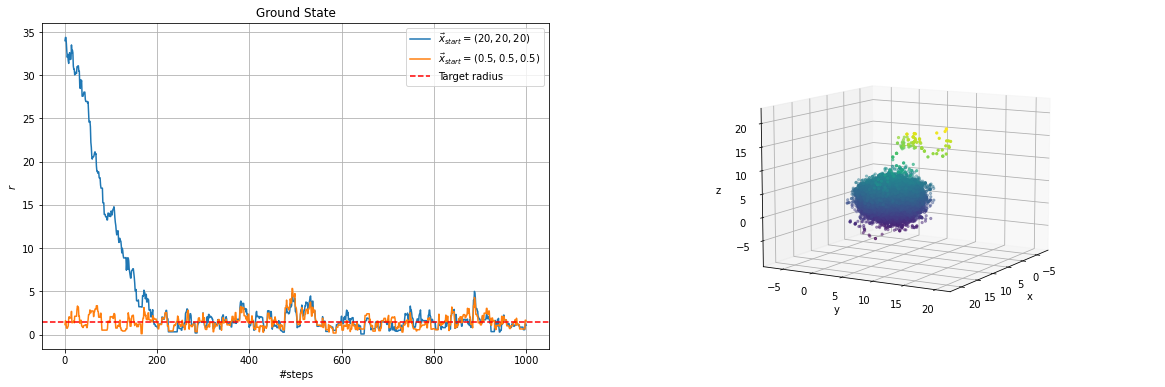

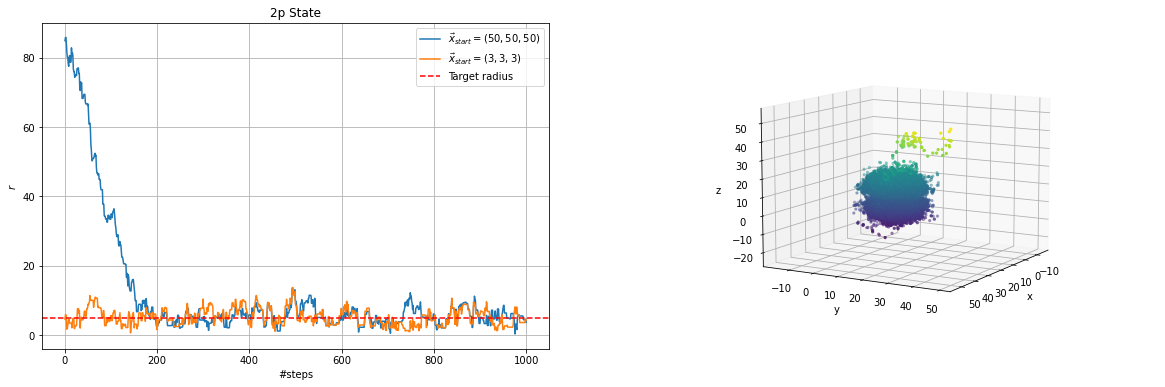

In [3]:
R = np.loadtxt('UNIF_GS/coordinates.txt', unpack=True, usecols=3)
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(20,6))
step = np.arange(len(R_gs[:1000])) + 1
ax0.plot(step, R_gs[:1000], label=r'$\vec{x}_{start}=(20,20,20)$')
ax0.plot(step, R[:1000], label=r'$\vec{x}_{start}=(0.5,0.5,0.5)$')
ax0.axhline(y=1.5, color='r', ls='--', label='Target radius')
ax0.set_title('Ground State')
ax0.set_xlabel('#steps')
ax0.set_ylabel(r'$r$')
ax0.legend()
ax0.grid(True)

ax1.axis('off')
ax1 = fig.add_subplot(122, projection='3d')
ax1.scatter(X_gs, Y_gs, Z_gs, c=Z_gs, marker='.')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(10, 30)
plt.show()

R = np.loadtxt('UNIF_2P/coordinates.txt', unpack=True, usecols=3)
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(20,6))
ax0.plot(step, R_2p[:1000], label=r'$\vec{x}_{start}=(50,50,50)$')
ax0.plot(step, R[:1000], label=r'$\vec{x}_{start}=(3,3,3)$')
ax0.axhline(y=5, color='r', ls='--', label='Target radius')
ax0.set_title('2p State')
ax0.set_xlabel('#steps')
ax0.set_ylabel(r'$r$')
ax0.legend()
ax0.grid(True)

ax1.axis('off')
ax1 = fig.add_subplot(122, projection='3d')
ax1.scatter(X_2p, Y_2p, Z_2p, c=Z_2p, marker='.')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(10, 30)
plt.show()

Dai grafici sulla sinistra possiamo osservare come partendo molto lontani dall'origine, è necessario equilibrare il campionamento prima di iniziare con la misura effettiva. Infatti, il campionamento statistico ottenuto con l'algoritmo di Metropolis è corretto solo asintoticamente. Tuttavia, poichè dopo circa 200 passi l'algoritmo converge verso la zona di interesse, scegliendo un numero di passi in ogni blocco sufficentemente grande (e.g. $L=5000$), questo non risulta essere un grosso problema. Nei risultati che seguono si è scelto comunque un punto di partenza ragionevolmente vicino ai valori attesi per i raggi, dato che in questo caso sono noti i risultati esatti dalla teoria. Osservando come i punti campionati si distribuiscono nello spazio 3D dai grafici sulla destra, si può apprezzare la simmetria sferica dello stato fondamentale e i due lobi che caratterizzano lo stato 2p.

### Stato fondamentale

In [4]:
unif_gs_radius = np.loadtxt('UNIF_GS/radius.txt')
gauss_gs_radius = np.loadtxt('GAUSS_GS/radius.txt')

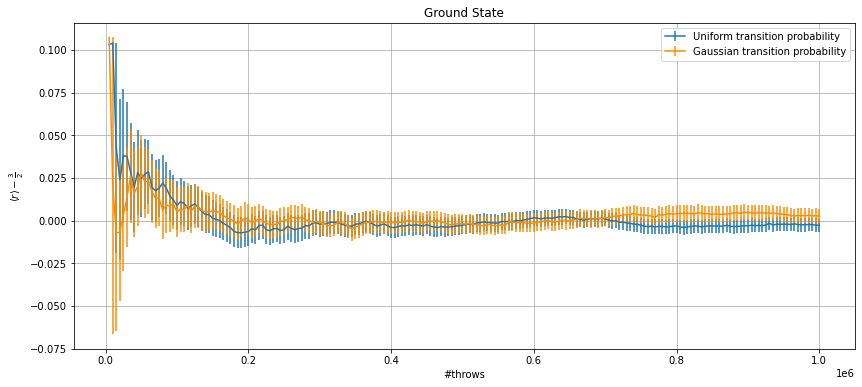

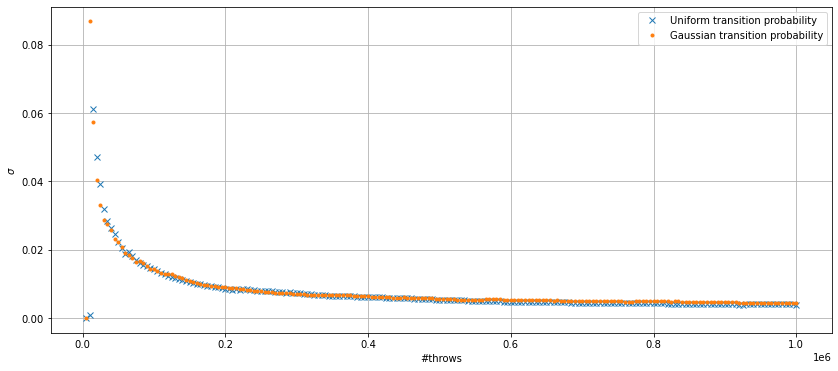

In [5]:
M=1000000             # Total number of throws
N=200                 # Number of blocks
L=int(M/N)            # Number of throws in each block
x = np.arange(N) + 1  # [0,1,2,...,N-1]
x*=L                  # Number of throws = block * (Number of throws in each block)

plt.figure(figsize=(14,6))
plt.errorbar(x, unif_gs_radius[:,0]-1.5, yerr=unif_gs_radius[:,1], label='Uniform transition probability')
plt.errorbar(x, gauss_gs_radius[:,0]-1.5, yerr=gauss_gs_radius[:,1], color='darkorange', label='Gaussian transition probability')
plt.title('Ground State')
plt.xlabel('#throws')
plt.ylabel(r'$\langle r\rangle -\frac{3}{2}$')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,6))
plt.plot(x, unif_gs_radius[:,1], marker='x', linestyle='none', label='Uniform transition probability')
plt.plot(x, gauss_gs_radius[:,1], marker='.', linestyle='none',  label='Gaussian transition probability')
plt.xlabel('#throws')
plt.ylabel('$\sigma$')
plt.grid(True)
plt.legend()
plt.show()

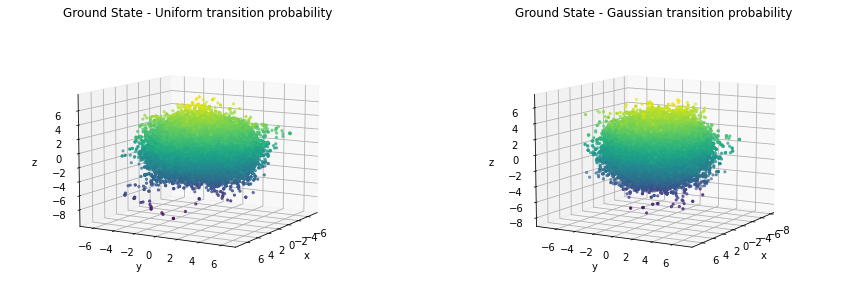

In [6]:
X, Y, Z, R = np.loadtxt('UNIF_GS/coordinates.txt', unpack=True, usecols=(0,1,2,3))
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))
ax0.axis('off')
ax0 = fig.add_subplot(121, projection='3d')
ax0.scatter(X, Y, Z, c=Z, marker='.')
ax0.set_title('Ground State - Uniform transition probability')
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.set_zlabel('z')
ax0.view_init(10, 30)

X, Y, Z, R = np.loadtxt('GAUSS_GS/coordinates.txt', unpack=True, usecols=(0,1,2,3))
ax1.axis('off')
ax1 = fig.add_subplot(122, projection='3d')
ax1.scatter(X, Y, Z, c=Z, marker='.')
ax1.set_title('Ground State - Gaussian transition probability')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(10, 30)
plt.show()

### Stato 2p

In [7]:
unif_2p_radius = np.loadtxt('UNIF_2P/radius.txt')
gauss_2p_radius = np.loadtxt('GAUSS_2P/radius.txt')

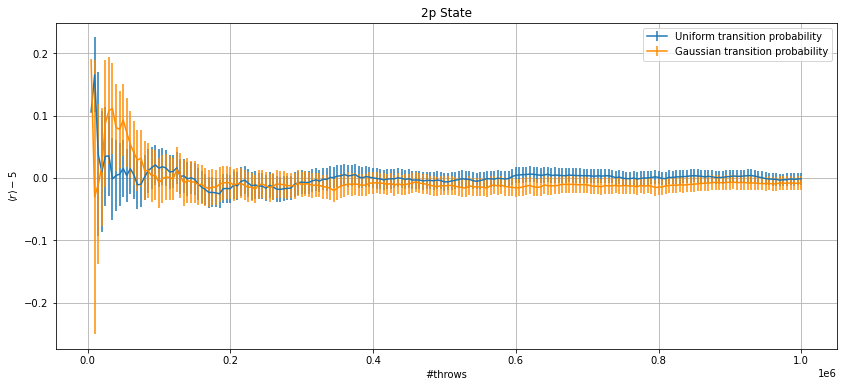

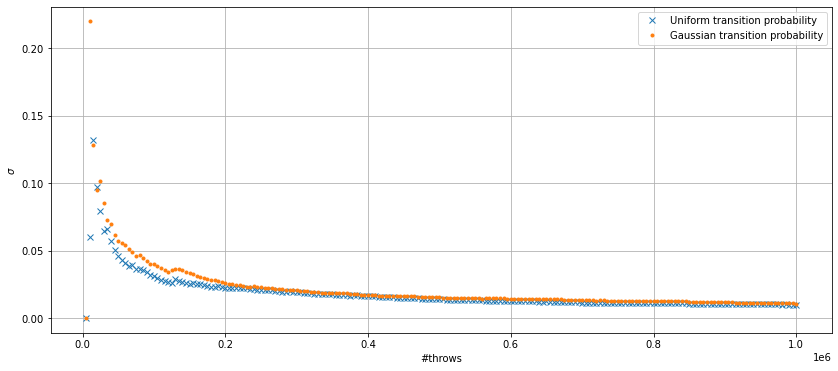

In [8]:
plt.figure(figsize=(14,6))
plt.errorbar(x, unif_2p_radius[:,0]-5, yerr=unif_2p_radius[:,1], label='Uniform transition probability')
plt.errorbar(x, gauss_2p_radius[:,0]-5, yerr=gauss_2p_radius[:,1], color='darkorange', label='Gaussian transition probability')
plt.title('2p State')
plt.xlabel('#throws')
plt.ylabel(r'$\langle r\rangle-5$')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,6))
plt.plot(x, unif_2p_radius[:,1], marker='x', linestyle='none', label='Uniform transition probability')
plt.plot(x, gauss_2p_radius[:,1], marker='.', linestyle='none',  label='Gaussian transition probability')
plt.xlabel('#throws')
plt.ylabel('$\sigma$')
plt.grid(True)
plt.legend()
plt.show()

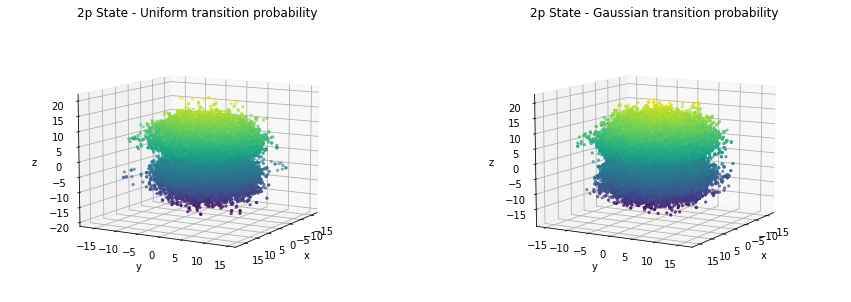

In [9]:
X, Y, Z, R = np.loadtxt('UNIF_2P/coordinates.txt', unpack=True, usecols=(0,1,2,3))
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))
ax0.axis('off')
ax0 = fig.add_subplot(121, projection='3d', )
ax0.scatter(X, Y, Z, c=Z, marker='.')
ax0.set_title('2p State - Uniform transition probability')
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.set_zlabel('z')
ax0.view_init(10, 30)

X, Y, Z, R = np.loadtxt('GAUSS_2P/coordinates.txt', unpack=True, usecols=(0,1,2,3))
ax1.axis('off')
ax1 = fig.add_subplot(122, projection='3d')
ax1.scatter(X, Y, Z, c=Z, marker='.')
ax1.set_title('2p State - Gaussian transition probability')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(10, 30)
plt.show()

Le stime Monte Carlo sono compatibili con i risultati attesi dal modello teorico. Dai grafici non si osservano sostanziali differenze nell'applicare una transizione di probabilità uniforme e una normale multivariata.